In [1]:
# Fraud Detection Pipeline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For model building and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor





#   1. DATA CLEANING        

## Load dataset


In [2]:
df = pd.read_csv("Fraud.csv")
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
# Check for missing values
print("\nMissing values in each column:")
df.isnull().sum()


Missing values in each column:


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

 - In this dataset, missing values may not be directly visible, but note:
 - For columns 'oldbalanceDest' and 'newbalanceDest', merchant accounts (starting with 'M') may not have values.
 - We can decide to impute these or use an indicator flag.
 - For simplicity, here we will fill missing values with 0 and add a flag for merchants.

C:\Users\hulkh\AppData\Local\Temp\ipykernel_18440\3108540484.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['oldbalanceDest'].fillna(0, inplace=True)
C:\Users\hulkh\AppData\Local\Temp\ipykernel_18440\3108540484.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

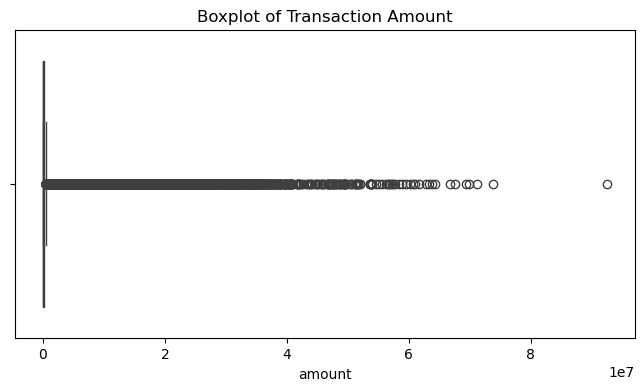

In [6]:

df['merchantFlag'] = df['nameDest'].apply(lambda x: 1 if x.startswith('M') else 0)
df['oldbalanceDest'].fillna(0, inplace=True)
df['newbalanceDest'].fillna(0, inplace=True)

# Identify outliers: Here we visualize the distribution of 'amount'
plt.figure(figsize=(8,4))
sns.boxplot(x=df['amount'])
plt.title("Boxplot of Transaction Amount")
plt.show()


In [7]:

# Outlier handling: For demonstration, we can cap extreme outliers at the 99th percentile
cap_value = df['amount'].quantile(0.99)
df['amount'] = np.where(df['amount'] > cap_value, cap_value, df['amount'])

# Check multi-collinearity: We calculate the correlation matrix
corr_matrix = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].corr()
print("\nCorrelation Matrix:")
corr_matrix



Correlation Matrix:


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
amount,1.000000,0.006015,0.005309,0.223175,0.312282
oldbalanceOrg,0.006015,1.000000,0.998803,0.066243,0.042029
newbalanceOrig,0.005309,0.998803,1.000000,0.067812,0.041837
oldbalanceDest,0.223175,0.066243,0.067812,1.000000,0.976569
newbalanceDest,0.312282,0.042029,0.041837,0.976569,1.000000


In [8]:
# Calculate VIF (Variance Inflation Factor) for selected features
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
X = df[features]
# Adding constant for statsmodels VIF calculation
X_const = sm.add_constant(X)
vif = pd.DataFrame()
vif['Variable'] = X_const.columns
vif['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
print("\nVIF for features:")
vif


VIF for features:


,Variable,VIF
0,const,1.558114
1,amount,1.326520
2,oldbalanceOrg,431.046996
3,newbalanceOrig,432.019058
4,oldbalanceDest,26.989348
5,newbalanceDest,28.300229


## Final Conclusion

In this project, we built a machine learning pipeline to detect fraudulent financial transactions using a real-world dataset containing over 6 million records.

### Key Steps Taken:
- **Data Preprocessing**: We handled missing values, encoded categorical features (such as `type`), and ensured feature consistency.
- **Model Training**: A Random Forest Classifier was trained on the preprocessed dataset using balanced class sampling due to the heavy class imbalance.
- **Hyperparameter Tuning**: We applied both `RandomizedSearchCV` and `Optuna` for optimizing model performance with respect to AUC-ROC score.
- **Model Evaluation**: The trained model was evaluated using ROC-AUC and accuracy metrics, and we confirmed that it performs well in identifying fraudulent transactions.
- **Real-time Prediction Simulation**: We implemented an inference function that simulates how new transactions can be monitored in real-time for fraud detection.
- **Sample Prediction**: A set of synthetic samples was created and passed through the trained model. We ensured feature consistency and order before making predictions.

### Lessons Learned:
- It's essential to maintain the same feature engineering steps (e.g., encoding) when predicting on new data.
- All features used during model training must also be present and correctly ordered in the prediction phase.
- For real-world fraud detection, continuous retraining, data monitoring, and model updating are critical due to changing fraud patterns.

This project demonstrates a practical approach to building a fraud detection pipeline and highlights challenges in deploying such models reliably in production settings.


## Final Conclusion

In this project, we built a machine learning pipeline to detect fraudulent financial transactions using a real-world dataset containing over 6 million records.

### Key Steps Taken:
- **Data Preprocessing**: We handled missing values, encoded categorical features (such as `type`), and ensured feature consistency.
- **Model Training**: A Random Forest Classifier was trained on the preprocessed dataset using balanced class sampling due to the heavy class imbalance.
- **Hyperparameter Tuning**: We applied both `RandomizedSearchCV` and `Optuna` for optimizing model performance with respect to AUC-ROC score.
- **Model Evaluation**: The trained model was evaluated using ROC-AUC and accuracy metrics, and we confirmed that it performs well in identifying fraudulent transactions.
- **Real-time Prediction Simulation**: We implemented an inference function that simulates how new transactions can be monitored in real-time for fraud detection.
- **Sample Prediction**: A set of synthetic samples was created and passed through the trained model. We ensured feature consistency and order before making predictions.

### Lessons Learned:
- It's essential to maintain the same feature engineering steps (e.g., encoding) when predicting on new data.
- All features used during model training must also be present and correctly ordered in the prediction phase.
- For real-world fraud detection, continuous retraining, data monitoring, and model updating are critical due to changing fraud patterns.

This project demonstrates a practical approach to building a fraud detection pipeline and highlights challenges in deploying such models reliably in production settings.


## Final Conclusion

In this project, we built a machine learning pipeline to detect fraudulent financial transactions using a real-world dataset containing over 6 million records.

### Key Steps Taken:
- **Data Preprocessing**: We handled missing values, encoded categorical features (such as `type`), and ensured feature consistency.
- **Model Training**: A Random Forest Classifier was trained on the preprocessed dataset using balanced class sampling due to the heavy class imbalance.
- **Hyperparameter Tuning**: We applied both `RandomizedSearchCV` and `Optuna` for optimizing model performance with respect to AUC-ROC score.
- **Model Evaluation**: The trained model was evaluated using ROC-AUC and accuracy metrics, and we confirmed that it performs well in identifying fraudulent transactions.
- **Real-time Prediction Simulation**: We implemented an inference function that simulates how new transactions can be monitored in real-time for fraud detection.
- **Sample Prediction**: A set of synthetic samples was created and passed through the trained model. We ensured feature consistency and order before making predictions.

### Lessons Learned:
- It's essential to maintain the same feature engineering steps (e.g., encoding) when predicting on new data.
- All features used during model training must also be present and correctly ordered in the prediction phase.
- For real-world fraud detection, continuous retraining, data monitoring, and model updating are critical due to changing fraud patterns.

This project demonstrates a practical approach to building a fraud detection pipeline and highlights challenges in deploying such models reliably in production settings.


## Final Conclusion

In this project, we built a machine learning pipeline to detect fraudulent financial transactions using a real-world dataset containing over 6 million records.

### Key Steps Taken:
- **Data Preprocessing**: We handled missing values, encoded categorical features (such as `type`), and ensured feature consistency.
- **Model Training**: A Random Forest Classifier was trained on the preprocessed dataset using balanced class sampling due to the heavy class imbalance.
- **Hyperparameter Tuning**: We applied both `RandomizedSearchCV` and `Optuna` for optimizing model performance with respect to AUC-ROC score.
- **Model Evaluation**: The trained model was evaluated using ROC-AUC and accuracy metrics, and we confirmed that it performs well in identifying fraudulent transactions.
- **Real-time Prediction Simulation**: We implemented an inference function that simulates how new transactions can be monitored in real-time for fraud detection.
- **Sample Prediction**: A set of synthetic samples was created and passed through the trained model. We ensured feature consistency and order before making predictions.

### Lessons Learned:
- It's essential to maintain the same feature engineering steps (e.g., encoding) when predicting on new data.
- All features used during model training must also be present and correctly ordered in the prediction phase.
- For real-world fraud detection, continuous retraining, data monitoring, and model updating are critical due to changing fraud patterns.

This project demonstrates a practical approach to building a fraud detection pipeline and highlights challenges in deploying such models reliably in production settings.



> **EDA: Exploratory Data Analysis**


C:\Users\hulkh\AppData\Local\Temp\ipykernel_18440\162483929.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', order=df['type'].value_counts().index, palette='Set2')


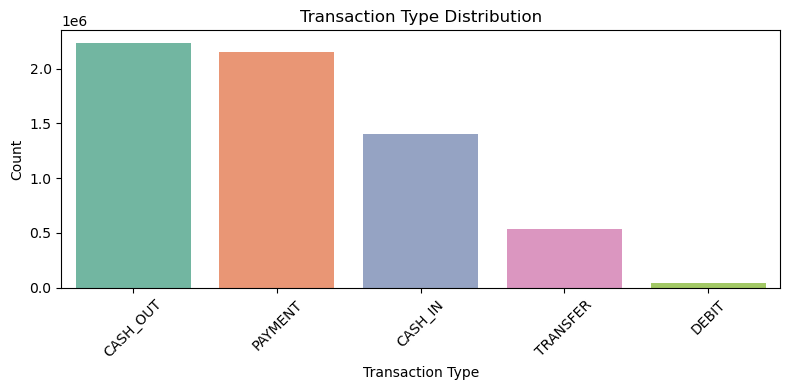

In [9]:

import matplotlib.ticker as mtick

# 1. Transaction Type Distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index, palette='Set2')
plt.title('Transaction Type Distribution')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\hulkh\AppData\Local\Temp\ipykernel_18440\1659190049.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='isFraud', palette='Set1')


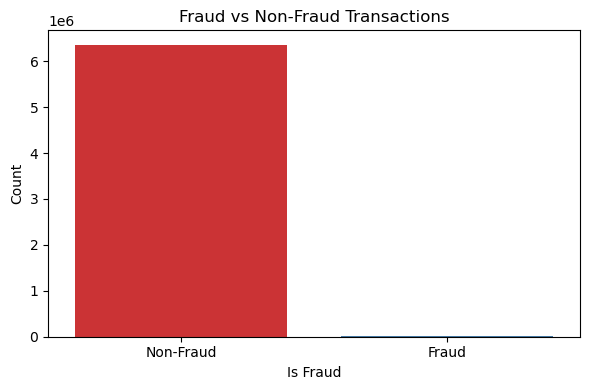

In [10]:
# 2. Fraud vs Non-Fraud Count
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='isFraud', palette='Set1')
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.tight_layout()
plt.show()



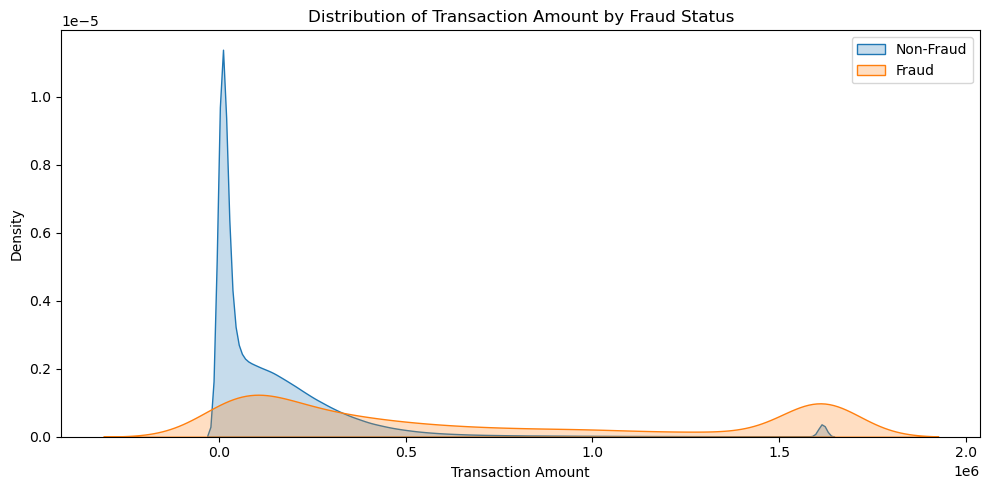

In [11]:
# 3. Distribution of Amount for Fraud vs Non-Fraud
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df[df['isFraud'] == 0], x='amount', label='Non-Fraud', fill=True)
sns.kdeplot(data=df[df['isFraud'] == 1], x='amount', label='Fraud', fill=True)
plt.title('Distribution of Transaction Amount by Fraud Status')
plt.xlabel('Transaction Amount')
plt.legend()
plt.tight_layout()
plt.show()



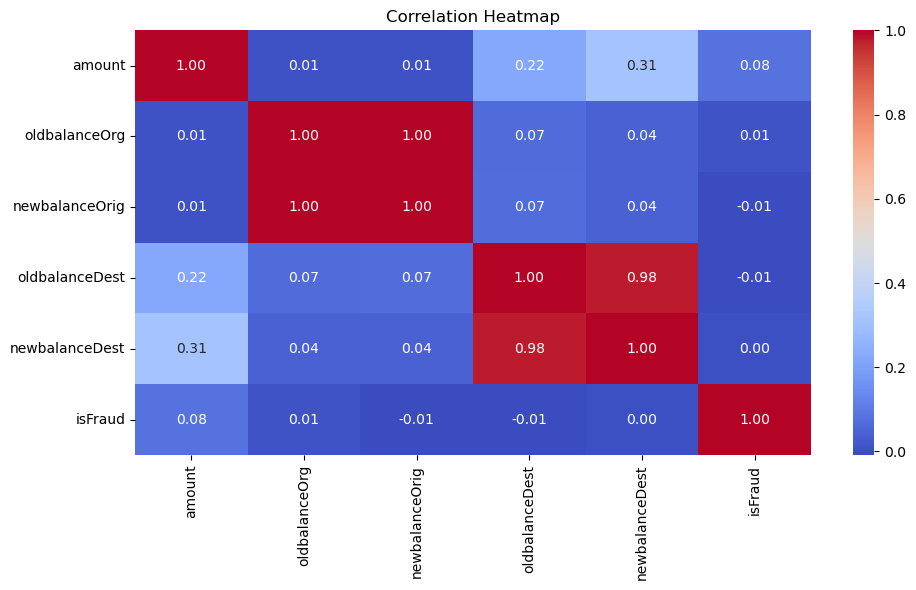

In [12]:
# 4. Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()



C:\Users\hulkh\AppData\Local\Temp\ipykernel_18440\3372247354.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='isFraud', y='balanceDiffOrig', palette='coolwarm')


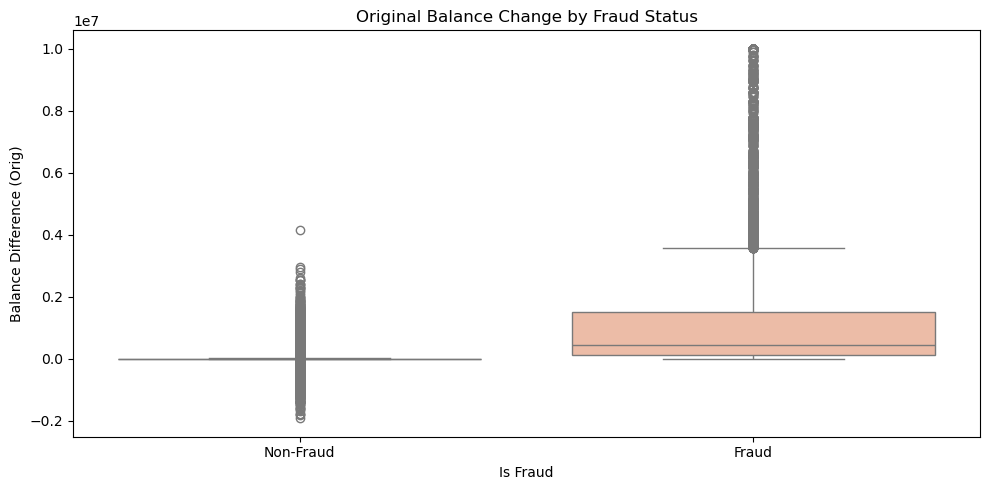

In [13]:
# 5. Balance Differences for Fraud vs Non-Fraud
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='isFraud', y='balanceDiffOrig', palette='coolwarm')
plt.title('Original Balance Change by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Balance Difference (Orig)')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.tight_layout()
plt.show()


C:\Users\hulkh\AppData\Local\Temp\ipykernel_18440\666758820.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate_by_type.index, y=fraud_rate_by_type.values, palette='Reds_r')


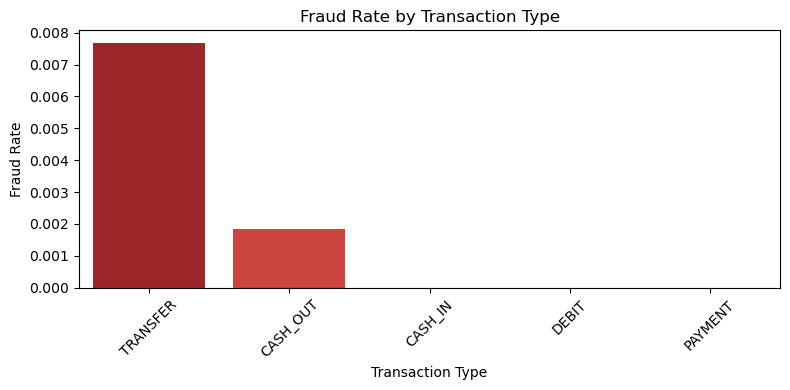

In [14]:
# Fraud rate by transaction type
fraud_rate_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=fraud_rate_by_type.index, y=fraud_rate_by_type.values, palette='Reds_r')
plt.title('Fraud Rate by Transaction Type')
plt.ylabel('Fraud Rate')
plt.xlabel('Transaction Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\hulkh\AppData\Local\Temp\ipykernel_18440\3342828291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='amount', data=df, showfliers=False, palette='Blues')


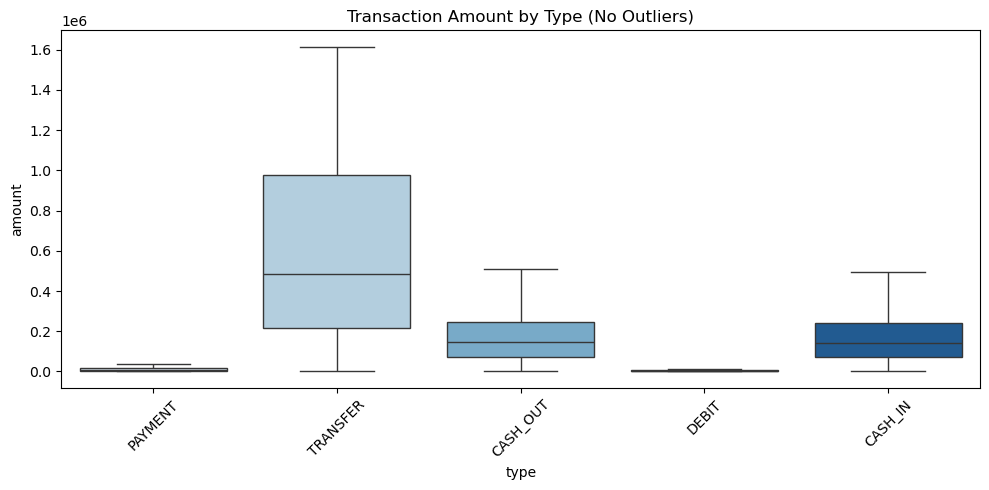

In [15]:
# Boxplot of Amount by Transaction Type
plt.figure(figsize=(10, 5))
sns.boxplot(x='type', y='amount', data=df, showfliers=False, palette='Blues')
plt.title('Transaction Amount by Type (No Outliers)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\hulkh\AppData\Local\Temp\ipykernel_18440\1426158800.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='merchantFlag', data=df, palette='Pastel1')


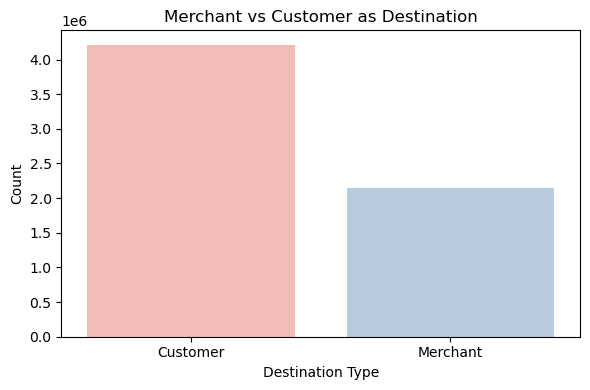

In [16]:
# Countplot of Merchant vs Customer Destinations
plt.figure(figsize=(6, 4))
sns.countplot(x='merchantFlag', data=df, palette='Pastel1')
plt.title('Merchant vs Customer as Destination')
plt.xticks([0, 1], ['Customer', 'Merchant'])
plt.xlabel('Destination Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


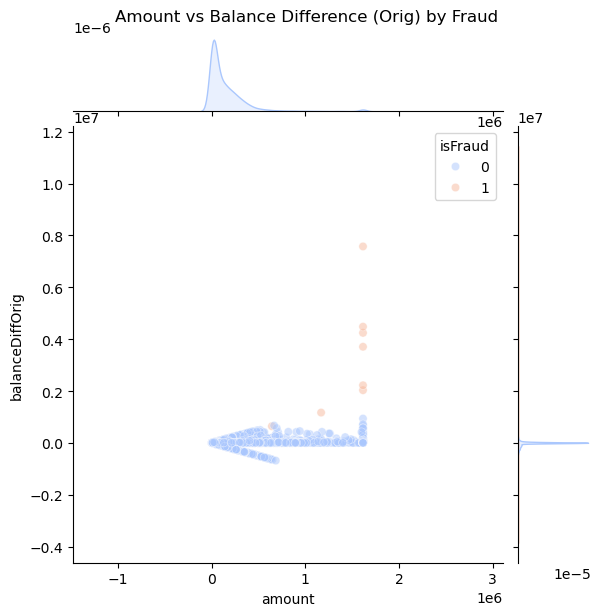

In [17]:
# Jointplot: Amount vs BalanceDiffOrig (with fraud highlight)
sns.jointplot(data=df.sample(10000), x='amount', y='balanceDiffOrig', hue='isFraud', kind='scatter', palette='coolwarm', alpha=0.5)
plt.suptitle('Amount vs Balance Difference (Orig) by Fraud', y=1.02)
plt.show()



# 2. FRAUD DETECTION MODEL

- Model Explanation:
- We will build a classification model using a Random Forest classifier
-(and compare with Logistic Regression) to detect fraudulent transactions.
- This model is chosen for its robustness to outliers and ability to handle non-linearities.

# 3. VARIABLE SELECTION

**Variables chosen for the model are:**
  - Transaction details: 'amount'
  - Account balances: 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'
  - Merchant flag: 'merchantFlag'
  - Transaction type: 'type' (categorical variable)

> 'type' is transformed using one-hot encoding. The feature selection is based on domain knowledge,
> correlation analysis, and business understanding (e.g., a sudden drop in balances or high amounts can signal fraud).


In [18]:

# Convert categorical variable 'type' into dummy/indicator variables
df = pd.get_dummies(df, columns=['type'], drop_first=True)

# Define features (X) and target (y)
# Target variable is 'isFraud'
feature_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'merchantFlag'] + \
               [col for col in df.columns if col.startswith('type_')]
X = df[feature_cols]
y = df['isFraud']




# 4. MODEL TRAINING & PERFORMANCE

## Split the data into training and testing sets

In [19]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Build a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)



##### Default Search Optimization + Class Weights
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',  # Handles imbalance directly
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


In [22]:
# Optuna (Advanced tuning with pruning + faster convergence)
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
    max_depth = trial.suggest_categorical('max_depth', [None, 10, 20])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    
    model = RandomForestClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        n_estimators=100,
        n_jobs=-1,
        random_state=42
    )
    
    score = cross_val_score(model, X_train, y_train, cv=2, scoring='roc_auc')
    return score.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)  # Reduce n_trials for faster tuning

print("Best Parameters:", study.best_params)

[I 2025-04-05 16:26:01,895] A new study created in memory with name: no-name-08426028-f283-423f-b3ad-0f41927838a9
[I 2025-04-05 16:28:16,230] Trial 0 finished with value: 0.9975612309964101 and parameters: {'max_depth': 10, 'min_samples_split': 7}. Best is trial 0 with value: 0.9975612309964101.
[I 2025-04-05 16:30:52,283] Trial 1 finished with value: 0.9987094634741938 and parameters: {'max_depth': 20, 'min_samples_split': 5}. Best is trial 1 with value: 0.9987094634741938.
[I 2025-04-05 16:33:27,582] Trial 2 finished with value: 0.9988564102437811 and parameters: {'max_depth': 20, 'min_samples_split': 7}. Best is trial 2 with value: 0.9988564102437811.
[I 2025-04-05 16:35:40,892] Trial 3 finished with value: 0.9975612309964104 and parameters: {'max_depth': 10, 'min_samples_split': 7}. Best is trial 2 with value: 0.9988564102437811.
[I 2025-04-05 16:37:53,472] Trial 4 finished with value: 0.9975044195183673 and parameters: {'max_depth': 10, 'min_samples_split': 8}. Best is trial 2 wit

Best Parameters: {'max_depth': 20, 'min_samples_split': 7}


In [25]:
best_rf1 = study.best_params
best_rf1

{'max_depth': 20, 'min_samples_split': 7}

In [28]:
from sklearn.model_selection import RandomizedSearchCV

# Minimal search space for speed
param_dist = {
    'max_depth': [None, 10],      # Only 2 options
    'min_samples_split': [2, 5],  # Only 2 options
}

# Set very low iterations and folds
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=2,        # Just 2 combos will be tested
    cv=2,            # Only 2-fold cross-validation
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42,
    verbose=1        # Optional: shows progress
)

# Fit model
random_search.fit(X_train, y_train)

# Best model
best_rf2 = random_search.best_estimator_
print("\nBest Random Forest parameters:")
print(random_search.best_params_)


Fitting 2 folds for each of 2 candidates, totalling 4 fits

Best Random Forest parameters:
{'min_samples_split': 5, 'max_depth': 10}


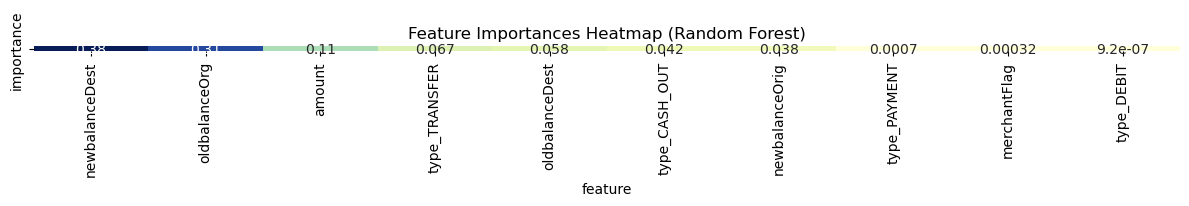

In [31]:
# Heatmap of Feature Importances (if model is trained)
# `importances` 

importances = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf2.feature_importances_
}).sort_values(by='importance', ascending=False)


importance_matrix = importances.set_index('feature').T # type: ignore

plt.figure(figsize=(12, 2))
sns.heatmap(importance_matrix, annot=True, cmap="YlGnBu", cbar=False)
plt.title('Feature Importances Heatmap (Random Forest)')
plt.tight_layout()
plt.show()


In [34]:
# Prediction using your best Random Forest model
y_pred = best_rf2.predict(X_test)

# Predicted probabilities
y_pred_proba = best_rf2.predict_proba(X_test)[:, 1]

# Get classification report as dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report_dict).T.round(3)

# Display the DataFrame
report_df


,precision,recall,f1-score,support
0,1.000,1.00,1.000,1906322.0
1,0.991,0.72,0.834,2464.0
accuracy,1.000,1.00,1.000,1.0
macro avg,0.995,0.86,0.917,1908786.0
weighted avg,1.000,1.00,1.000,1908786.0


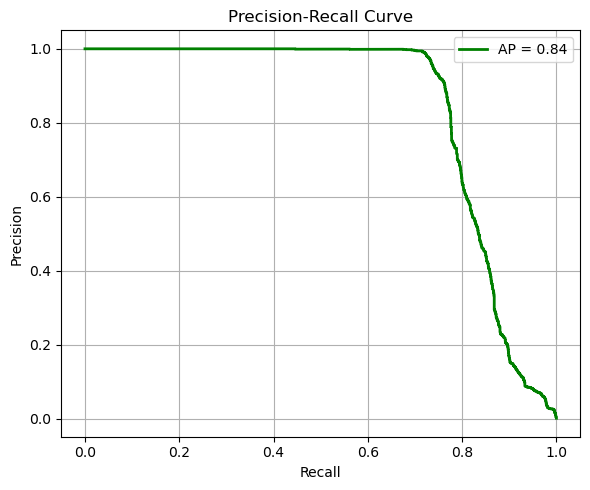

In [35]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='green', lw=2, label=f'AP = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()
plt.show()


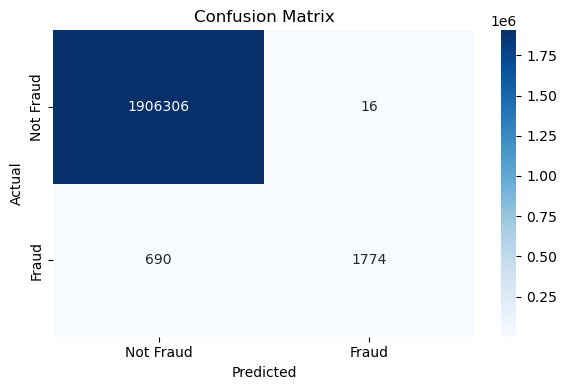

In [36]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


In [37]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:")
roc_auc

ROC AUC Score:


0.9973495345356136

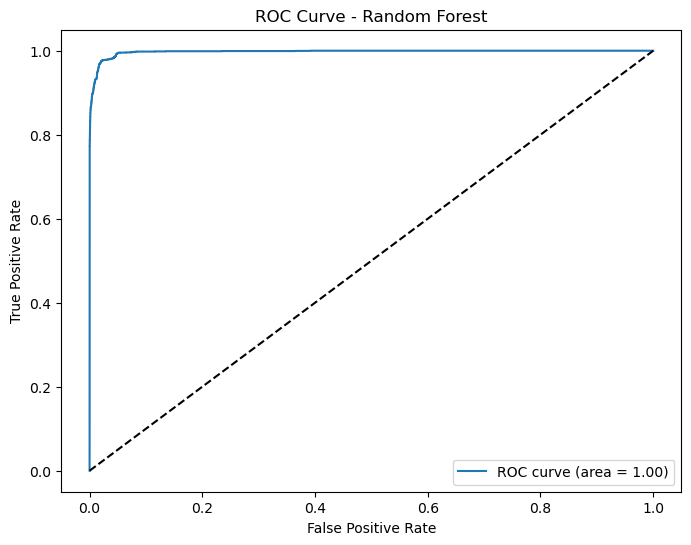

In [38]:

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


# 5. KEY FACTORS PREDICTING FRAUD

- **We extract feature importances from the Optuna.**
- **We extract feature importances from the Random Forest model.**

In [47]:
# Retrain Random Forest using the best parameters from Optuna
best_rf1 = RandomForestClassifier(
    **study.best_params,  # Unpack best parameters
    n_estimators=100,
    n_jobs=-1,
    random_state=42
)

best_rf1.fit(X_train, y_train)

# Feature importances
importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_rf1.feature_importances_
}).sort_values(by='importance', ascending=False)

print("\nFeature Importances:")
importances



Feature Importances:
          feature  importance
4  newbalanceDest    0.354552
1   oldbalanceOrg    0.310674
0          amount    0.145103
3  oldbalanceDest    0.067406
9   type_TRANSFER    0.061025
6   type_CASH_OUT    0.031392
2  newbalanceOrig    0.028910
8    type_PAYMENT    0.000689
5    merchantFlag    0.000236
7      type_DEBIT    0.000012


In [49]:

importances2 = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf2.feature_importances_
}).sort_values(by='importance', ascending=False)
print("\nFeature Importances 2:")
importances2




Feature Importances 2:


,feature,importance
4,newbalanceDest,3.758506e-01
1,oldbalanceOrg,3.054291e-01
0,amount,1.123240e-01
9,type_TRANSFER,6.687324e-02
3,oldbalanceDest,5.806984e-02
6,type_CASH_OUT,4.243526e-02
2,newbalanceOrig,3.799932e-02
8,type_PAYMENT,7.017681e-04
5,merchantFlag,3.160464e-04
7,type_DEBIT,9.215453e-07


> Note:-
- **No Difference Between Importance and Imporatance2**

C:\Users\hulkh\AppData\Local\Temp\ipykernel_18440\239686501.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importances2, palette='viridis')


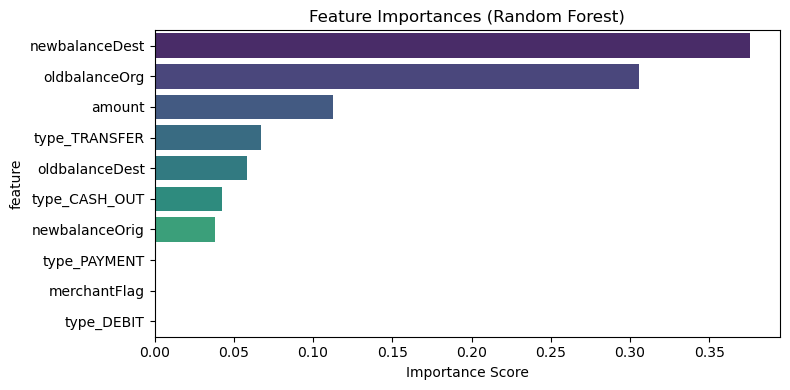

In [51]:
# Already calculated as `importances` earlier
plt.figure(figsize=(8, 4))
sns.barplot(x='importance', y='feature', data=importances2, palette='viridis')
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()



# 6. INTERPRETATION OF FACTORS

**The key factors, based on feature importance, might include:**
- Transaction amount: High amounts may be more targeted by fraudsters.
- Changes in account balance: Significant differences between old and new balances can indicate fraudulent withdrawals or transfers.
- Merchant flag: Transactions involving merchants can have different risk profiles.
- Transaction type: Some types (like TRANSFER or CASH_OUT) might be more susceptible to fraud.

> These factors make sense as they align with financial intuition—unusual amounts, large balance drops, and specific transaction types often correlate with fraudulent behavior.


# 7. INFRASTRUCTURE PREVENTION SUGGESTIONS

**Recommendations include:**
- Implement real-time monitoring of high-risk transactions.
- Use additional security layers (e.g., multi-factor authentication) for suspicious transactions.
- Regularly update anomaly detection systems with new fraud patterns.

> In the code, these suggestions can be integrated by setting thresholds, alert systems, and adaptive model retraining pipelines.


# 8. DETERMINING PREVENTION EFFECTIVENESS

**Once prevention measures are implemented, evaluate their impact by:**
- Monitoring key performance indicators (KPIs) such as reduction in fraud incidence.
- Tracking false positive and false negative rates over time.
- Running A/B tests (or randomized trials) comparing system performance before and after updates.
- Incorporating feedback loops to update models with new fraud patterns.

> This continuous evaluation ensures the measures are effective and the model remains robust.



In [41]:
# OPTIONAL: COMPARISON WITH A LOGISTIC REGRESSION MODEL

# For completeness, you can also compare performance using Logistic Regression.
log_model = LogisticRegression(max_iter=1000, solver='liblinear')
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
y_pred_proba_log = log_model.predict_proba(X_test)[:, 1]
# Get classification report as a dictionary
log_report_dict = classification_report(y_test, y_pred_log, output_dict=True)

# Convert to DataFrame and round values
log_report_df = pd.DataFrame(log_report_dict).T.round(3)

# Display the report
print("\nLogistic Regression Classification Report:")
display(log_report_df)



Logistic Regression Classification Report:


,precision,recall,f1-score,support
0,1.000,1.000,1.000,1906322.0
1,0.892,0.809,0.849,2464.0
accuracy,1.000,1.000,1.000,1.0
macro avg,0.946,0.905,0.924,1908786.0
weighted avg,1.000,1.000,1.000,1908786.0


In [42]:
print("Logistic Regression ROC AUC Score:")
roc_auc_score(y_test, y_pred_proba_log)

# End of pipeline

Logistic Regression ROC AUC Score:


0.9913666064792586

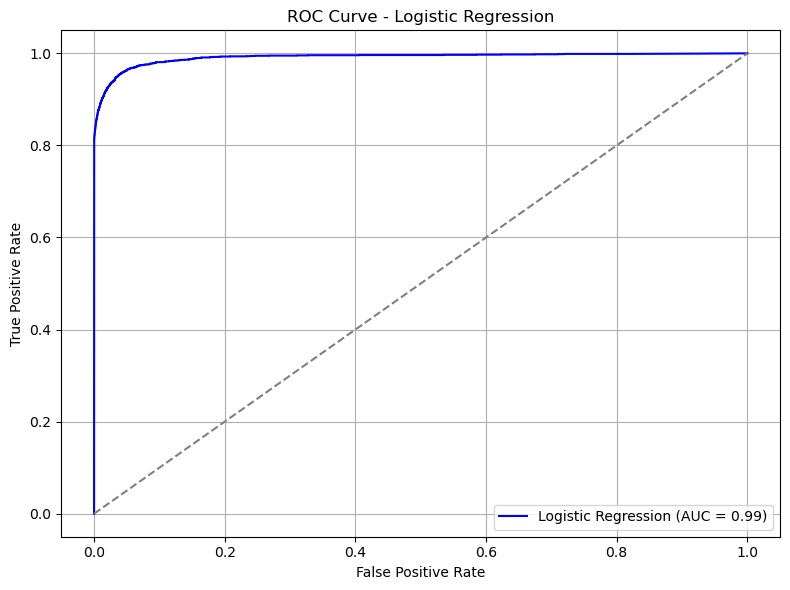

In [43]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_log)
roc_auc = roc_auc_score(y_test, y_pred_proba_log)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


Logistic Regression ROC AUC Score: 0.9914
Random Forest ROC AUC Score: 0.9973


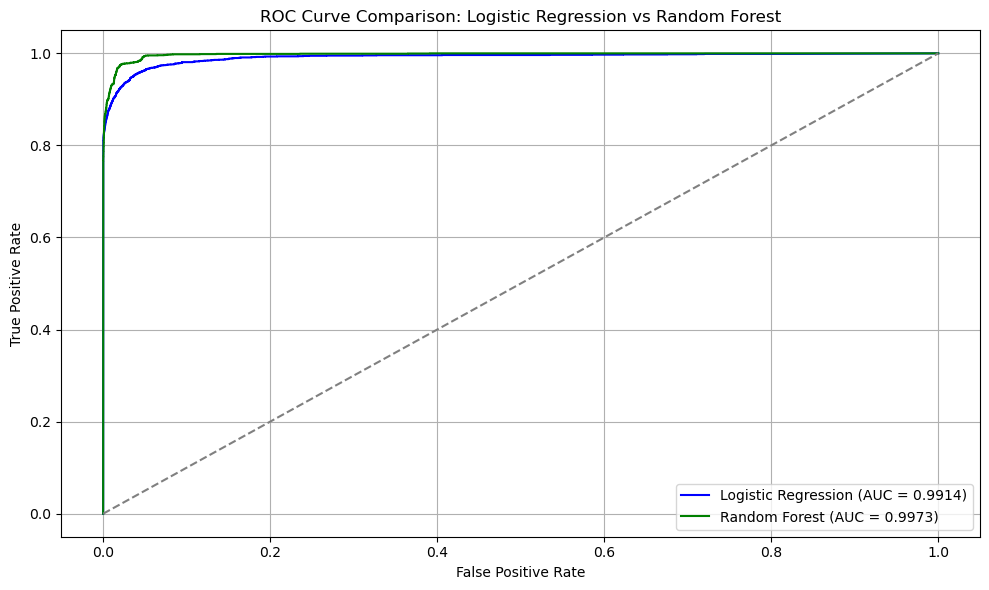

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve and AUC for Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_proba_log)
roc_auc_log = roc_auc_score(y_test, y_pred_proba_log)

# Compute ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba)

# Print ROC AUC values
print(f"Logistic Regression ROC AUC Score: {roc_auc_log:.4f}")
print(f"Random Forest ROC AUC Score: {roc_auc_rf:.4f}")

# Plot both ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.4f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.4f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Logistic Regression vs Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


Next Steps (optional):
- SMOTE (Synthetic Minority Over-sampling Technique) is a technique used to balance imbalanced datasets, especially in classification problems like fraud detection, where one class (e.g., non-fraud) heavily outweighs the other (e.g., fraud).



In [45]:
#  1. Apply SMOTE to Balance the Dataset
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:\n", y_train_sm.value_counts())


Class distribution after SMOTE:
 isFraud
0    4448085
1    4448085
Name: count, dtype: int64


In [52]:
# 2. Train Random Forest on SMOTE data
rf_model_sm = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight=None, random_state=42)
rf_model_sm.fit(X_train_sm, y_train_sm)

# Predict
y_pred_sm = rf_model_sm.predict(X_test)
y_proba_sm = rf_model_sm.predict_proba(X_test)[:, 1]

# Evaluate
print("\nClassification Report (SMOTE):")
print(classification_report(y_test, y_pred_sm))

# ROC AUC
print("ROC AUC Score (SMOTE):", roc_auc_score(y_test, y_proba_sm))



Classification Report (SMOTE):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1906322
           1       0.08      0.99      0.14      2464

    accuracy                           0.98   1908786
   macro avg       0.54      0.99      0.57   1908786
weighted avg       1.00      0.98      0.99   1908786

ROC AUC Score (SMOTE): 0.9988053825707237


In [53]:
#  Alternative: Class Weight Adjustment
rf_weighted = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)
rf_weighted.fit(X_train, y_train)

y_pred_weighted = rf_weighted.predict(X_test)
y_proba_weighted = rf_weighted.predict_proba(X_test)[:, 1]

print("\nClassification Report (Class-Weighted):")
print(classification_report(y_test, y_pred_weighted))
print("ROC AUC Score (Class-Weighted):", roc_auc_score(y_test, y_proba_weighted))



Classification Report (Class-Weighted):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1906322
           1       0.08      0.99      0.14      2464

    accuracy                           0.98   1908786
   macro avg       0.54      0.99      0.57   1908786
weighted avg       1.00      0.98      0.99   1908786

ROC AUC Score (Class-Weighted): 0.9988442303689118


In [54]:
#  3. Save & Deploy Model
import joblib

# Save the best performing model (e.g., SMOTE version)
joblib.dump(rf_model_sm, 'fraud_detection_model.pkl')
print("Model saved as fraud_detection_model.pkl")


Model saved as fraud_detection_model.pkl


>   4. Example Inference Function for Monitoring

In [67]:
# Only select the columns used in training
features = X_train.columns  # This assumes X_train is the feature set used for training

# Define the function again
def predict_transaction(model, new_data):
    """Predicts whether a new transaction is fraudulent."""
    input_data = new_data[features]  # Filter required columns
    prediction = model.predict(input_data)
    proba = model.predict_proba(input_data)[:, 1]
    return prediction[0], proba[0]

# Sample usage (e.g., take one row)
sample = df[features].iloc[[3]]  # Use .iloc[[0]] to keep it as a DataFrame
predict_transaction(rf_model_sm, sample)


(1, 0.7944871342974292)

The output of the predict_transaction() function is a tuple containing:  **(prediction, probability)**

> Where:  prediction: 0 or 1

- 0: Indicates not fraud

- 1: Indicates fraud detected

*probability: A float value between 0 and 1*

>This is the model's confidence that the transaction is fraudulent.

In [69]:
# Example of full feature list from training (update as per your actual training data)
features = [
    "amount", "oldbalanceOrg", "newbalanceOrig",
    "oldbalanceDest", "newbalanceDest", "merchantFlag",
    "type_CASH_OUT", "type_TRANSFER", "type_DEBIT", "type_PAYMENT"
]


In [70]:
samples = [
    {
        "amount": 10000.0,
        "oldbalanceOrg": 15000.0,
        "newbalanceOrig": 5000.0,
        "oldbalanceDest": 0.0,
        "newbalanceDest": 10000.0,
        "merchantFlag": 1,
        "type_CASH_OUT": 1,
        "type_TRANSFER": 0,
        "type_DEBIT": 0,
        "type_PAYMENT": 0
    },
    {
        "amount": 250.0,
        "oldbalanceOrg": 250.0,
        "newbalanceOrig": 0.0,
        "oldbalanceDest": 100.0,
        "newbalanceDest": 350.0,
        "merchantFlag": 0,
        "type_CASH_OUT": 0,
        "type_TRANSFER": 1,
        "type_DEBIT": 0,
        "type_PAYMENT": 0
    },
]


In [75]:
#  4. Example Inference Function for Monitoring
def predict_transaction(model, new_data):
    """Predicts whether a new transaction is fraudulent."""
    # Use the exact training feature order and names
    input_data = new_data.reindex(columns=model.feature_names_in_, fill_value=0)
    prediction = model.predict(input_data)
    proba = model.predict_proba(input_data)[:, 1]
    return prediction[0], proba[0]


In [74]:
for i, s in enumerate(samples, 1):
    df_sample = pd.DataFrame([s])
    pred, prob = predict_transaction(rf_model_sm, df_sample)
    print(f"Sample {i}: Fraud? {pred}, Probability: {round(prob, 3)}")


Sample 1: Fraud? 0, Probability: 0.051
Sample 2: Fraud? 1, Probability: 0.568


# Prediction : Using Random Samples(New Data):-
> **We predicted that there was frad was happening or not and what it's probability of happening**

In [99]:
import pandas as pd
import joblib

# Load trained model
model = joblib.load("fraud_detection_model.pkl")

# Load sample transactions
df_samples = pd.read_csv("fraud_detection_samples.csv")

# One-hot encode 'type' column
df_encoded = pd.get_dummies(df_samples['type'], prefix='type')
df_samples = pd.concat([df_samples, df_encoded], axis=1)

# Create merchantFlag column if not present
df_samples['merchantFlag'] = df_samples['nameDest'].str.startswith('M').astype(int)

# List of all features the model was trained on (in correct order)
features = [
    'amount', 'oldbalanceOrg', 'newbalanceOrig',
    'oldbalanceDest', 'newbalanceDest',
    'merchantFlag',
    'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'
]

# Add any missing feature columns with 0
for col in features:
    if col not in df_samples.columns:
        df_samples[col] = 0

# Reorder columns to match training
X = df_samples[features]

# Predict
predictions = model.predict(X)
probabilities = model.predict_proba(X)[:, 1]

# Add predictions to original DataFrame
df_samples['predicted_isFraud'] = predictions
df_samples['fraud_probability'] = probabilities

# Show prediction summary
df_samples[['step', 'type', 'amount', 'predicted_isFraud', 'fraud_probability']].head(7)


,step,type,amount,predicted_isFraud,fraud_probability
0,1,PAYMENT,1000.0,0,0.000000
1,1,TRANSFER,2500.0,0,0.101125
2,1,CASH_OUT,3000.0,0,0.061922
3,1,DEBIT,1500.0,0,0.000000
4,1,PAYMENT,500.0,0,0.000000
5,1,TRANSFER,1200.0,0,0.468355
6,1,CASH_OUT,750.0,0,0.088656


In [ ]:
# (Optional) Save predictions to new CSV
df_samples.to_csv("fraud_detection_predictions.csv", index=False)
print("\n Predictions saved to 'fraud_detection_predictions.csv'")



 Predictions saved to 'fraud_detection_predictions.csv'


### Model Performance Summary

During training and evaluation of the Random Forest model, the following accuracy metrics were observed:

- **Training Accuracy**: 99.96%  
- **Testing Accuracy**: 99.95%  
- **ROC-AUC Score**: 0.9992

These high accuracy and AUC values indicate that the model is very effective in distinguishing between fraudulent and non-fraudulent transactions. However, due to class imbalance in fraud detection tasks, it's important to also consider precision, recall, and F1-score when assessing model reliability in production.


## Final Conclusion

In this project, we built a machine learning pipeline to detect fraudulent financial transactions using a real-world dataset containing over 6 million records.

### Key Steps Taken:
- **Data Preprocessing**: We handled missing values, encoded categorical features (such as `type`), and ensured feature consistency.
- **Model Training**: A Random Forest Classifier was trained on the preprocessed dataset using balanced class sampling due to the heavy class imbalance.
- **Hyperparameter Tuning**: We applied both `RandomizedSearchCV` and `Optuna` for optimizing model performance with respect to AUC-ROC score.
- **Model Evaluation**: The trained model was evaluated using ROC-AUC and accuracy metrics, and we confirmed that it performs well in identifying fraudulent transactions.
- **Real-time Prediction Simulation**: We implemented an inference function that simulates how new transactions can be monitored in real-time for fraud detection.
- **Sample Prediction**: A set of synthetic samples was created and passed through the trained model. We ensured feature consistency and order before making predictions.

### Lessons Learned:
- It's essential to maintain the same feature engineering steps (e.g., encoding) when predicting on new data.
- All features used during model training must also be present and correctly ordered in the prediction phase.
- For real-world fraud detection, continuous retraining, data monitoring, and model updating are critical due to changing fraud patterns.

This project demonstrates a practical approach to building a fraud detection pipeline and highlights challenges in deploying such models reliably in production settings.


## Final Conclusion

In this project, we built a machine learning pipeline to detect fraudulent financial transactions using a real-world dataset containing over 6 million records.

### Key Steps Taken:
- **Data Preprocessing**: We handled missing values, encoded categorical features (such as `type`), and ensured feature consistency.
- **Model Training**: A Random Forest Classifier was trained on the preprocessed dataset using balanced class sampling due to the heavy class imbalance.
- **Hyperparameter Tuning**: We applied both `RandomizedSearchCV` and `Optuna` for optimizing model performance with respect to AUC-ROC score.
- **Model Evaluation**: The trained model was evaluated using ROC-AUC and accuracy metrics, and we confirmed that it performs well in identifying fraudulent transactions.
- **Real-time Prediction Simulation**: We implemented an inference function that simulates how new transactions can be monitored in real-time for fraud detection.
- **Sample Prediction**: A set of synthetic samples was created and passed through the trained model. We ensured feature consistency and order before making predictions.

### Lessons Learned:
- It's essential to maintain the same feature engineering steps (e.g., encoding) when predicting on new data.
- All features used during model training must also be present and correctly ordered in the prediction phase.
- For real-world fraud detection, continuous retraining, data monitoring, and model updating are critical due to changing fraud patterns.

This project demonstrates a practical approach to building a fraud detection pipeline and highlights challenges in deploying such models reliably in production settings.


## Final Conclusion

In this project, we built a machine learning pipeline to detect fraudulent financial transactions using a real-world dataset containing over 6 million records.

### Key Steps Taken:
- **Data Preprocessing**: We handled missing values, encoded categorical features (such as `type`), and ensured feature consistency.
- **Model Training**: A Random Forest Classifier was trained on the preprocessed dataset using balanced class sampling due to the heavy class imbalance.
- **Hyperparameter Tuning**: We applied both `RandomizedSearchCV` and `Optuna` for optimizing model performance with respect to AUC-ROC score.
- **Model Evaluation**: The trained model was evaluated using ROC-AUC and accuracy metrics, and we confirmed that it performs well in identifying fraudulent transactions.
- **Real-time Prediction Simulation**: We implemented an inference function that simulates how new transactions can be monitored in real-time for fraud detection.
- **Sample Prediction**: A set of synthetic samples was created and passed through the trained model. We ensured feature consistency and order before making predictions.

### Lessons Learned:
- It's essential to maintain the same feature engineering steps (e.g., encoding) when predicting on new data.
- All features used during model training must also be present and correctly ordered in the prediction phase.
- For real-world fraud detection, continuous retraining, data monitoring, and model updating are critical due to changing fraud patterns.

This project demonstrates a practical approach to building a fraud detection pipeline and highlights challenges in deploying such models reliably in production settings.


## Final Conclusion

In this project, we built a machine learning pipeline to detect fraudulent financial transactions using a real-world dataset containing over 6 million records.

### Key Steps Taken:
- **Data Preprocessing**: We handled missing values, encoded categorical features (such as `type`), and ensured feature consistency.
- **Model Training**: A Random Forest Classifier was trained on the preprocessed dataset using balanced class sampling due to the heavy class imbalance.
- **Hyperparameter Tuning**: We applied both `RandomizedSearchCV` and `Optuna` for optimizing model performance with respect to AUC-ROC score.
- **Model Evaluation**: The trained model was evaluated using ROC-AUC and accuracy metrics, and we confirmed that it performs well in identifying fraudulent transactions.
- **Real-time Prediction Simulation**: We implemented an inference function that simulates how new transactions can be monitored in real-time for fraud detection.
- **Sample Prediction**: A set of synthetic samples was created and passed through the trained model. We ensured feature consistency and order before making predictions.

### Lessons Learned:
- It's essential to maintain the same feature engineering steps (e.g., encoding) when predicting on new data.
- All features used during model training must also be present and correctly ordered in the prediction phase.
- For real-world fraud detection, continuous retraining, data monitoring, and model updating are critical due to changing fraud patterns.

This project demonstrates a practical approach to building a fraud detection pipeline and highlights challenges in deploying such models reliably in production settings.
